# Load and Save a model

This notebook loads a pretrained model and saves it.
The goal is to upload the model later to huggingface and test the model online.



## Import Libraries

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [26]:
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

# example
preprocess_input(np.asarray([0, 255]))

array([-1.,  1.], dtype=float32)

Note: Alternatively, you could rescale pixel values from `[0, 255]` to `[-1, 1]` using `tf.keras.layers.Rescaling`. <br>
It is recommended to use preprocess_input, because when you change an other base application, you don't have to change the scaling ratio.

In [27]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

# example
rescale(np.asarray([0, 255]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.,  1.], dtype=float32)>

Note: If using other `tf.keras.applications`, be sure to check the API doc to determine if they expect pixels in `[-1, 1]` or `[0, 1]`, or use the included `preprocess_input` function.

## Download the model from the pre-trained EfficientNet
You will create the base model from the **EfficientNetB4** model. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, instantiate a EfficientNetB4 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=True** argument, you load a network that does include the classification layers at the top, which is ideal for feature extraction.

In [38]:
IMG_SHAPE = (160, 160, 3)

In [39]:
# Create the base model from the pre-trained model EfficientNetB4
model = tf.keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE,
                                               
                                               # include_top=True :Includes the fully connected layers for predictions 
                                               include_top=True,

                                               # weights from the imagenet challenge.
                                               weights='imagenet')

In [30]:
model.build(input_shape=IMG_SHAPE)

In [31]:
model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_11 (Rescaling)       (None, 224, 224, 3)  0           ['input_9[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_11[0][0]']           
                                )                                                                 
                                                                                   

## Test the Model with a single image

1/1 [==============================] - 1s 863ms/step
419
[[('n02786058', 'Band_Aid', 0.30612308), ('n04209133', 'shower_cap', 0.06556439), ('n02992529', 'cellular_telephone', 0.05302838), ('n04357314', 'sunscreen', 0.026978359), ('n04584207', 'wig', 0.025888285)]]


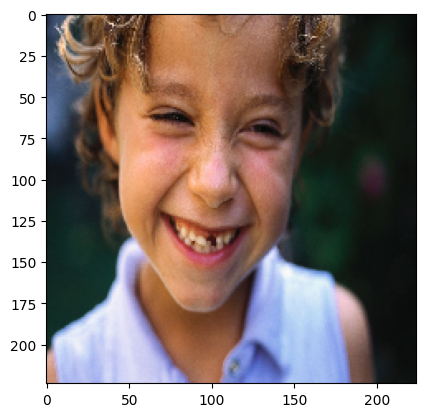

In [32]:
singel_tmp_image = tf.keras.utils.load_img('lachen.jpg',
                                            target_size=IMG_SHAPE,
                                            interpolation="nearest")


input_image = np.reshape(np.asarray(singel_tmp_image), ((1,) + IMG_SHAPE))
predictions = model.predict(input_image)
print(np.argmax(predictions))
print(tf.keras.applications.mobilenet_v3.decode_predictions(predictions))

plt.imshow(singel_tmp_image)


## Save Model

In [33]:
#Saving a Keras model:
model.save('hfmodels/mobilenetv3-imagenet')

INFO:tensorflow:Assets written to: hfmodels/mobilenetv3-imagenet\assets


INFO:tensorflow:Assets written to: hfmodels/mobilenetv3-imagenet\assets
